<a href="https://colab.research.google.com/github/NavedMansuri/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Cardiovascular Risk Prediction**

---




## **Problem Statement**

Several health conditions, your lifestyle, and your age and family history can increase your risk for heart disease. These are called risk factors. About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking.
Some risk factors for heart disease cannot be controlled, such as your age or family history. But you can take steps to lower your risk by changing the factors you can control.



*   The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.

*   The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD).

### Data Description
The dataset provides the patients' information. It includes over 3,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

Demographic:
* Sex: male or female("M" or "F")
* Age: Age of the patients (Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
* Education: The level of education of the patient (categorical values - 1,2,3,4)

Behavioral:

* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
* 

Medical( history):

* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (desired target)
* 10-year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

Objective: Building the classification model which best predict whether the patient has a 10-year risk of future coronary heart disease (CHD).

## **Importing the libraries and dataset:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# df = pd.read_csv("/content/drive/MyDrive/Cardiovascular Risk Prediction - Naved/Data Set/data_cardiovascular_risk.csv")
df = pd.read_csv("/content/data_cardiovascular_risk.csv")

## **Data exploration**

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
df.shape

(3390, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


### **Checking missing values and treat**

In [ ]:
null_val= df.isna().sum()
null_val.sum()

510

In [ ]:
null_val

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

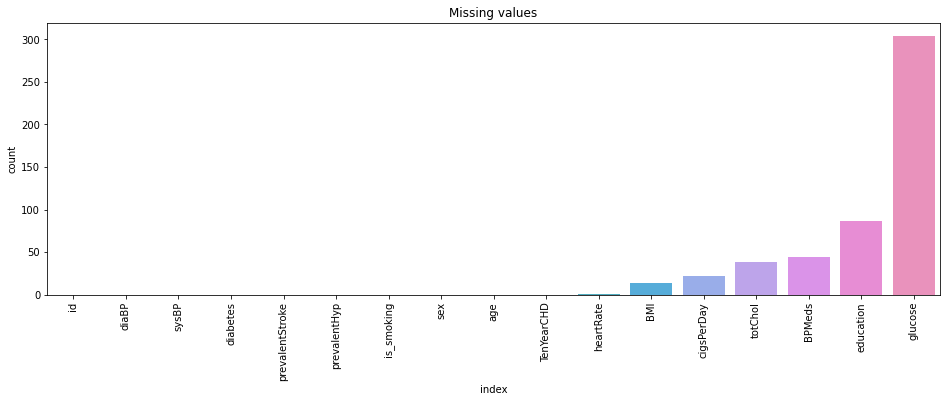

In [ ]:
#Visualising the missing values through pointplot
missing = pd.DataFrame((null_val.sort_values(ascending=True))).reset_index()
plt.figure(figsize=(16,5))
ax = sns.barplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =10)
plt.title("Missing values")
plt.ylabel("count")
plt.show()

**Glucose**

The **glucose** column contains 304 missing values. 

we have fill the missing values, so i am using median values for filling the missing values.

In [ ]:
df['glucose'].describe()

count    3086.000000
mean       82.086520
std        24.244753
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [ ]:
df['glucose']=df['glucose'].fillna(df['glucose'].median())

In [ ]:
df['glucose'].isna().sum()

0

**Education**           

In [ ]:
df['education'].describe()

count    3303.000000
mean        1.970936
std         1.019081
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64

In [ ]:
df['education'].unique()

array([ 2.,  4.,  1.,  3., nan])

Education feature is not a continues variable so we using Mode for filling the missing values.



In [ ]:
df['education']=df['education'].fillna(df['education'].mode()[0])

In [ ]:
df['education'].isna().sum()

0

**CigsPerDay**          

In [ ]:
df['cigsPerDay'].describe()

count    3368.000000
mean        9.069477
std        11.879078
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [ ]:
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].median())

In [ ]:
df['cigsPerDay'].isna().sum()

0

**BPMeds**              

In [ ]:
df['BPMeds'].describe()

count    3346.000000
mean        0.029886
std         0.170299
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64

In [ ]:
df['BPMeds'].unique()

array([ 0., nan,  1.])

In [ ]:
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mode()[0])

In [ ]:
df['BPMeds'].isna().sum()

0

**TotChol**             

In [ ]:
df['totChol'].describe()

count    3352.000000
mean      237.074284
std        45.247430
min       107.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       696.000000
Name: totChol, dtype: float64

In [ ]:
df['totChol']=df['totChol'].fillna(df['totChol'].median())

In [ ]:
df['totChol'].isna().sum()

0

**heartRate** only 1 and **BMI** 14 missing values, so we simply drop that nan values.


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### **Checking outliers and treat**

In [ ]:
df.drop(['id'], inplace=True,axis=1)

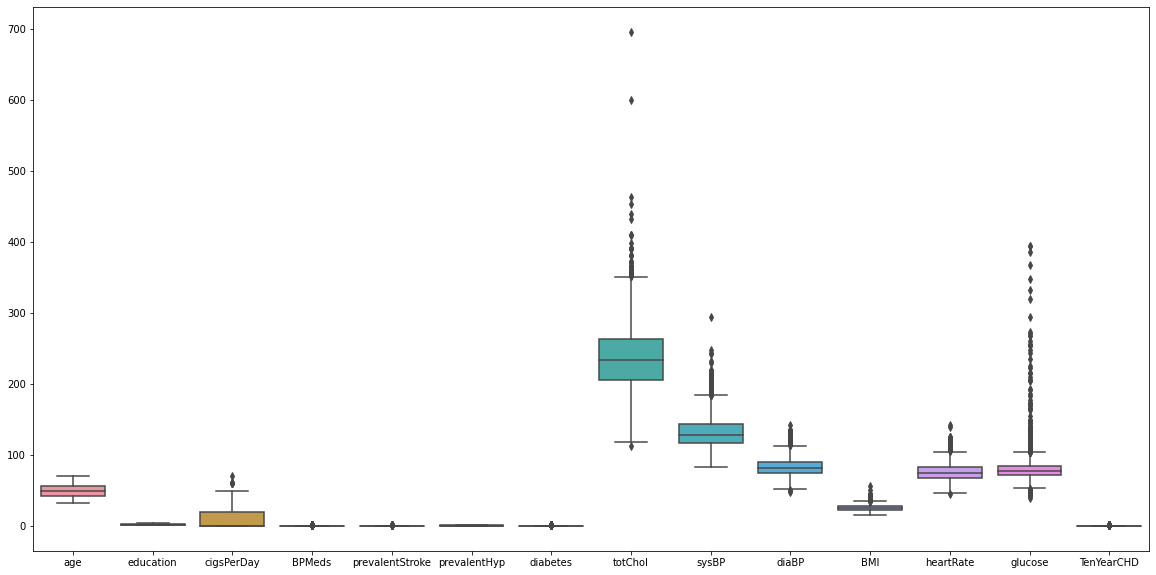

In [ ]:
#Plotting the box plot for checking the outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.show()

Outliers are noticed in:
*  totChol
*  sysBP
*  diaBP
*  BMI
*  heartRate
*  glucose
*  cigsPerDay 



In [ ]:
# Define a function for treating outliers
def outliers(data,cols):
    for i in cols:
        q1 = np.percentile(data[i], 25)
        q3 = np.percentile(data[i], 75) 
        IQR = q3-q1
        lwr_bound = q1-(IQR*1.5)
        upr_bound = q3+(IQR*1.5)       
        data[i]=np.where(data[i] > upr_bound,upr_bound,np.where(data[i] < lwr_bound,lwr_bound,data[i]))   

In [ ]:
# Apply fuction to treat outlies       
feature=['cigsPerDay','sysBP','diaBP','totChol', 'BMI', 'heartRate', 'glucose']
outliers(df,feature)

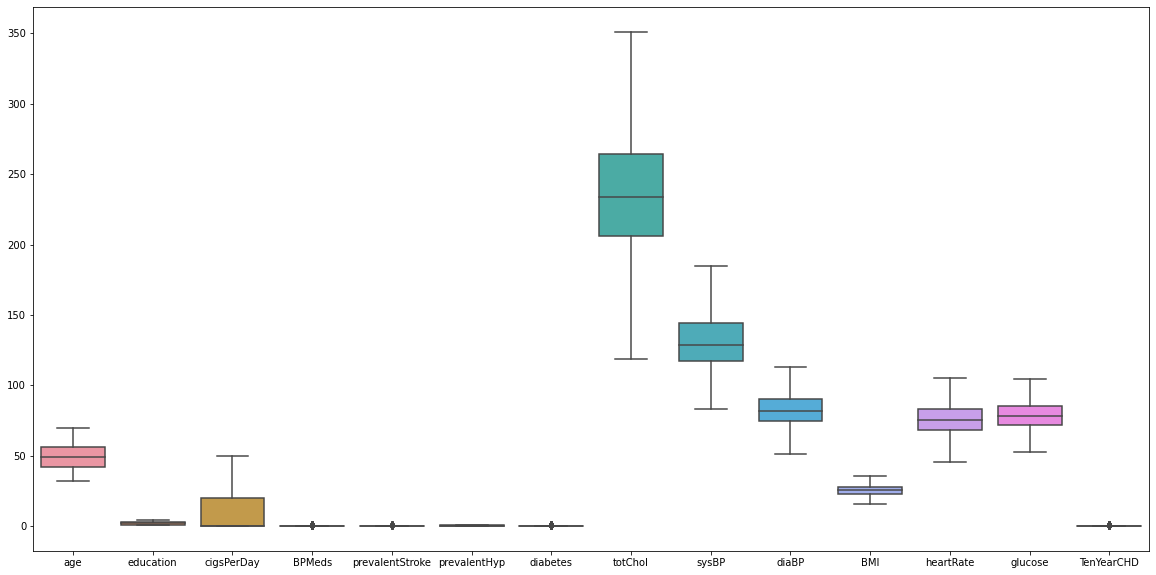

In [ ]:
#Having a look at the box plot in order to look for the outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.show()

## **EDA**

### **Analyzing the distribution of dependent variable**

In [ ]:
# defining dependent variable separately
dependent_var = ['TenYearCHD']

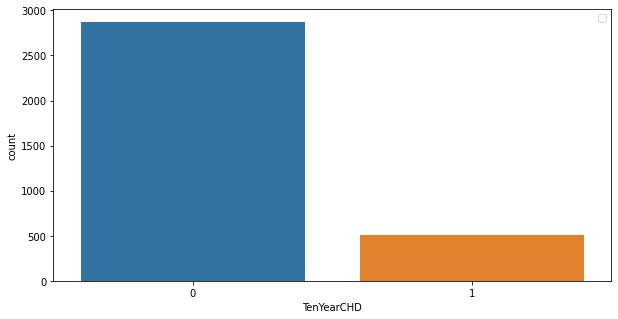

In [ ]:
#looking for our target variable
plt.figure(figsize=(10,5))
sns.countplot(x='TenYearCHD',data=df)

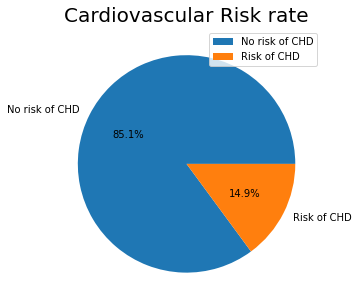

In [ ]:
# Let's just have a look at the distribution of the target varibale
plt.figure(figsize=(10,5))
labels = ['No risk of CHD','Risk of CHD']
plt.pie(df["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels = labels)
plt.title("Cardiovascular Risk rate",size=20)
plt.show()

In [ ]:
# visualizing the distribution of the dependent variable - rental bike count
plt.figure(figsize=(10,5))
sns.distplot(df[dependent_var])
plt.xlabel(dependent_var[0])
plt.title(dependent_var[0]+' distribution')
plt.axvline(df[dependent_var[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_var[0]].median(), color='cyan', linestyle='dashed', linewidth=2)

In [ ]:
# Distribution of dependent varaible - ten_year_chd
plt.figure(figsize=(10,5))
sns.countplot(df[dependent_var[0]])
plt.xlabel(dependent_var[0])
plt.title(dependent_var[0]+' distribution')